In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory = "/Volumes/PortableSSD/kreta_cleaned_export"

In [3]:
files = [f"frame-{i:05d}-flatfield-{j:02d}.tif" for i, j in zip(range(3630,3640), range(1,11))]
paths = [os.path.join(directory, f) for f in files]

flatfields = [cv2.imread(p) for p in paths]

In [4]:
flatfield = np.stack(flatfields).mean(axis=0).astype(np.uint8)
flatfield = cv2.cvtColor(flatfield, cv2.COLOR_BGR2RGB)

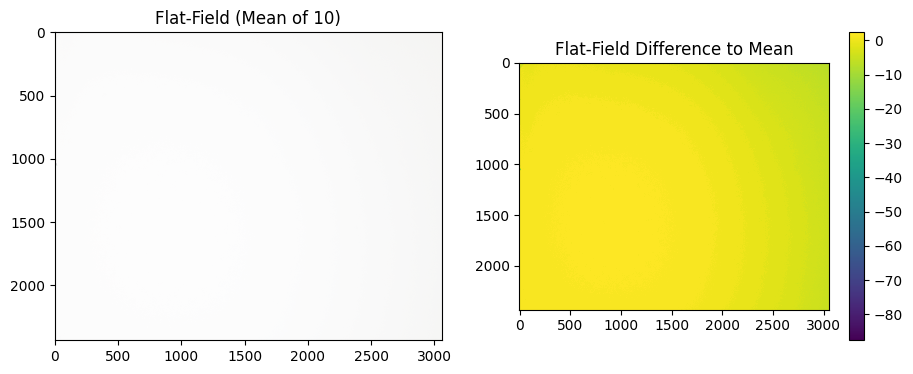

In [29]:
diff = flatfield.mean(axis=2) - flatfield.mean()

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Flat-Field (Mean of 10)")
plt.imshow(flatfield, interpolation="None")
plt.subplot(122)
plt.title("Flat-Field Difference to Mean")
plt.imshow(diff, interpolation="None")
plt.colorbar()
plt.show()

In [6]:
path = os.path.join(directory, "frame-01312.png")
frame = cv2.imread(path)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

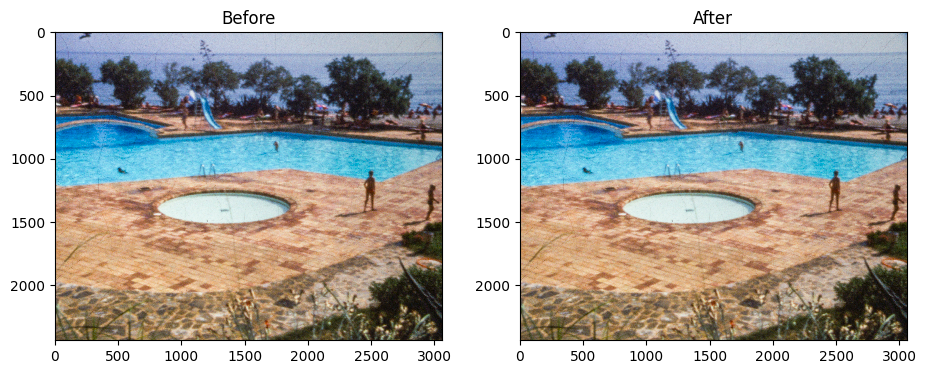

In [30]:
corrected = (frame / flatfield * flatfield.mean()).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.imshow(frame, interpolation="None")
plt.subplot(122)
plt.title("After")
plt.imshow(corrected, interpolation="None")
plt.show()

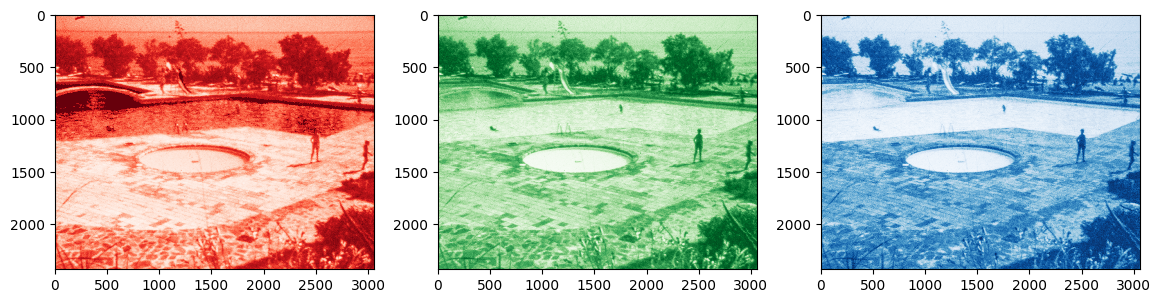

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(frame[:,:,0], interpolation="None", cmap="Reds_r")
plt.subplot(132)
plt.imshow(frame[:,:,1], interpolation="None", cmap="Greens_r")
plt.subplot(133)
plt.imshow(frame[:,:,2], interpolation="None", cmap="Blues_r")
plt.show()

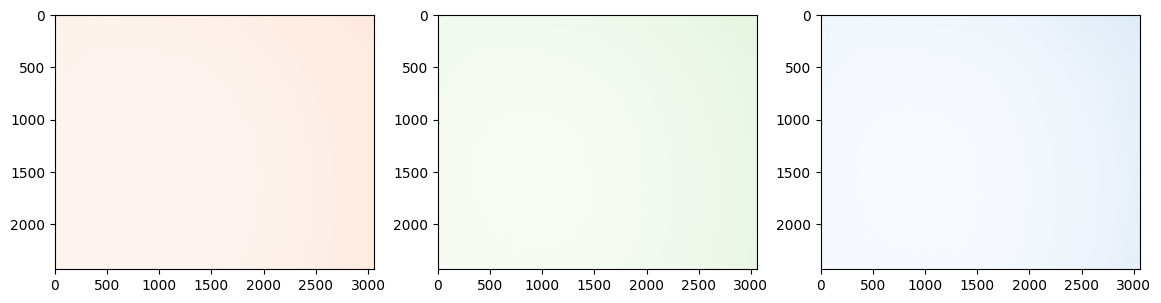

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(flatfield[:,:,0], interpolation="None", cmap="Reds_r")
plt.subplot(132)
plt.imshow(flatfield[:,:,1], interpolation="None", cmap="Greens_r")
plt.subplot(133)
plt.imshow(flatfield[:,:,2], interpolation="None", cmap="Blues_r")
plt.show()

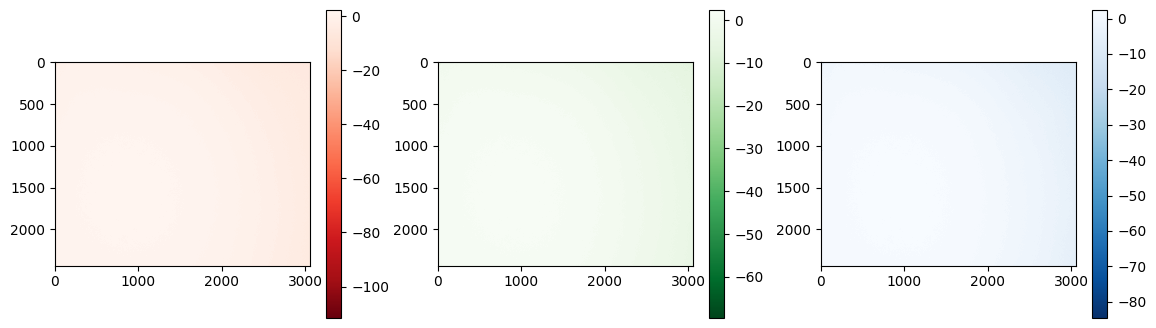

In [55]:
diff3 = np.empty_like(flatfield).astype(np.float)
for i in range(3):
    diff3[:,:,i] = flatfield[:,:,i].astype(np.float) - flatfield[:,:,i].mean()

plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(diff3[:,:,0], interpolation="None", cmap="Reds_r")
plt.colorbar()
plt.subplot(132)
plt.imshow(diff3[:,:,1], interpolation="None", cmap="Greens_r")
plt.colorbar()
plt.subplot(133)
plt.imshow(diff3[:,:,2], interpolation="None", cmap="Blues_r")
plt.colorbar()
plt.show()

In [23]:
diff3.min(), diff3.max()

(0, 255)

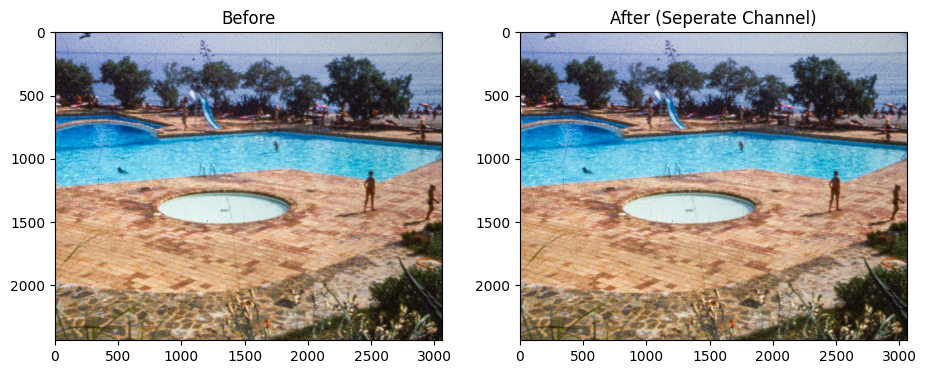

In [56]:
corrected3 = np.empty_like(frame).astype(np.float)
for i in range(3):
    corrected3[:,:,i] = frame[:,:,i] / flatfield[:,:,i] * flatfield[:,:,i].mean()
corrected3 = corrected.clip(0, 255).astype(np.uint8)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.imshow(frame, interpolation="None")
plt.subplot(122)
plt.title("After (Seperate Channel)")
plt.imshow(corrected3, interpolation="None")
plt.show()

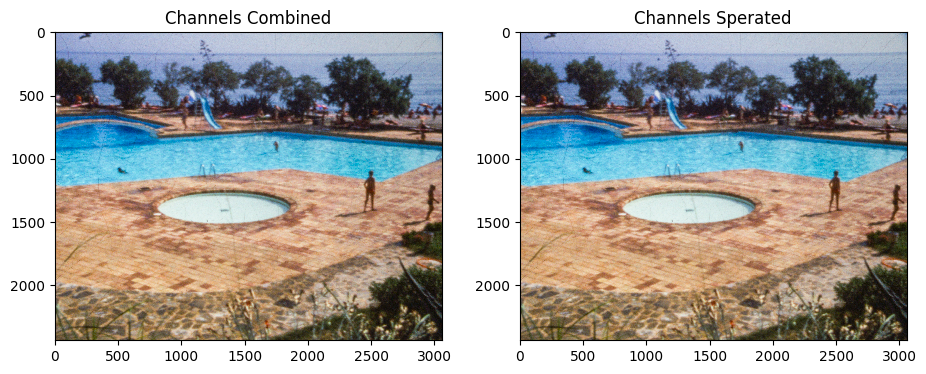

In [57]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Channels Combined")
plt.imshow(corrected, interpolation="None")
plt.subplot(122)
plt.title("Channels Sperated")
plt.imshow(corrected3, interpolation="None")
plt.show()

Difference in methods: Min=0.0, Max=0.0


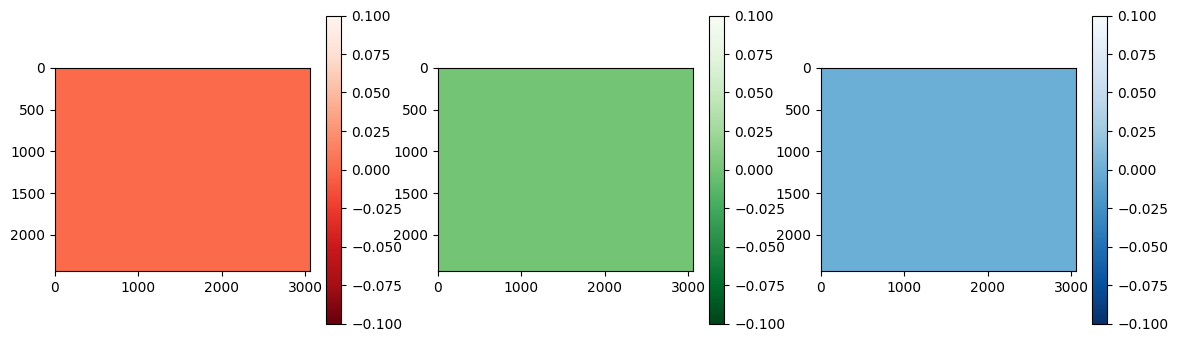

In [59]:
afterdiff = corrected.astype(np.float) - corrected3.astype(np.float)

print(f"Difference in methods: Min={afterdiff.min()}, Max={afterdiff.max()}")

plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(afterdiff[:,:,0], interpolation="None", cmap="Reds_r")
plt.colorbar()
plt.subplot(132)
plt.imshow(afterdiff[:,:,1], interpolation="None", cmap="Greens_r")
plt.colorbar()
plt.subplot(133)
plt.imshow(afterdiff[:,:,2], interpolation="None", cmap="Blues_r")
plt.colorbar()
plt.show()

Difference in methods: Min=-3.0, Max=70.0


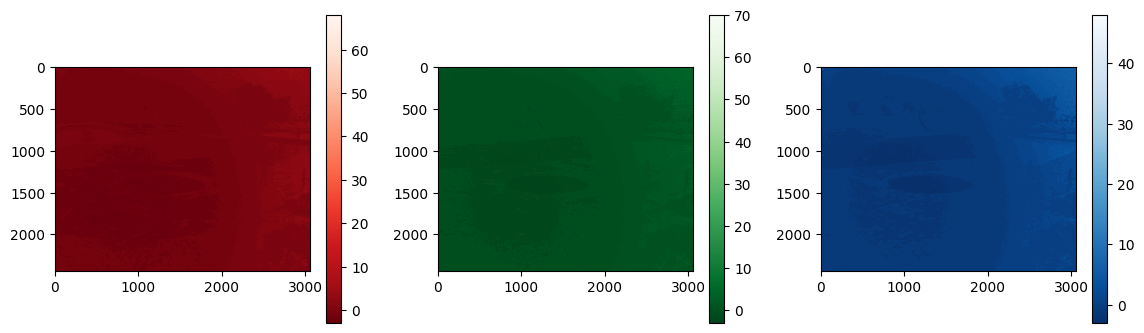

In [63]:
correctdiff = corrected.astype(np.float) - frame.astype(np.float)

print(f"Difference in methods: Min={correctdiff.min()}, Max={correctdiff.max()}")

plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(correctdiff[:,:,0], interpolation="None", cmap="Reds_r")
plt.colorbar()
plt.subplot(132)
plt.imshow(correctdiff[:,:,1], interpolation="None", cmap="Greens_r")
plt.colorbar()
plt.subplot(133)
plt.imshow(correctdiff[:,:,2], interpolation="None", cmap="Blues_r")
plt.colorbar()
plt.show()

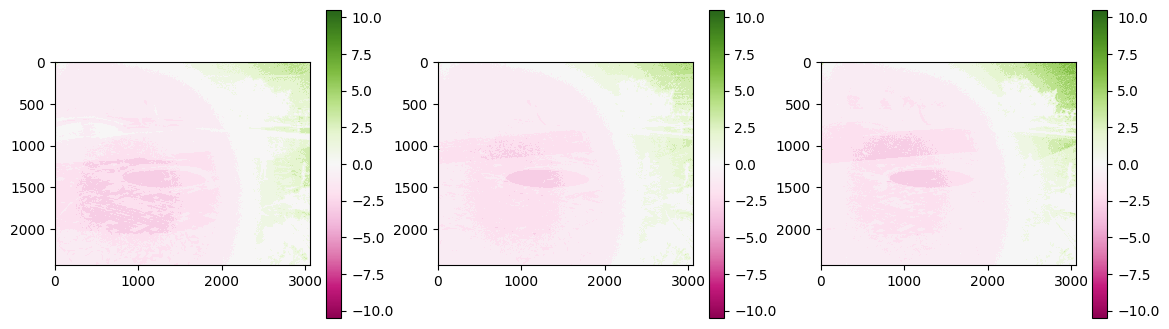

In [68]:
vlim = (np.abs(correctdiff).max() + np.abs(correctdiff).min()) / 2 * 0.3

plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(correctdiff[:,:,0], interpolation="None", cmap="PiYG", vmin=-vlim, vmax=vlim)
plt.colorbar()
plt.subplot(132)
plt.imshow(correctdiff[:,:,1], interpolation="None", cmap="PiYG", vmin=-vlim, vmax=vlim)
plt.colorbar()
plt.subplot(133)
plt.imshow(correctdiff[:,:,2], interpolation="None", cmap="PiYG", vmin=-vlim, vmax=vlim)
plt.colorbar()
plt.show()

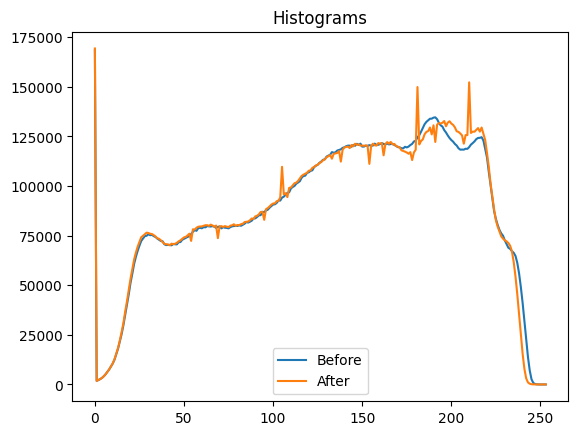

In [76]:
plt.title("Histograms")
frame_hist, _ = np.histogram(frame, bins=range(0,255))
plt.plot(frame_hist, label="Before")
corrected_hist, _ = np.histogram(corrected, bins=range(0,255))
plt.plot(corrected_hist, label="After")
plt.legend()
plt.show()

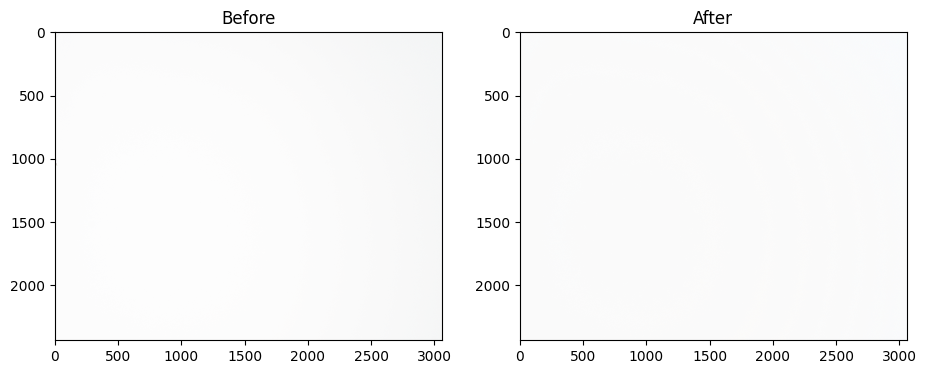

In [77]:
test_flatfield = flatfields[0].copy()

corrected_test_bright = (test_flatfield / flatfield * flatfield.mean()).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.imshow(test_flatfield, interpolation="None")
plt.subplot(122)
plt.title("After")
plt.imshow(corrected_test_bright, interpolation="None")
plt.show()

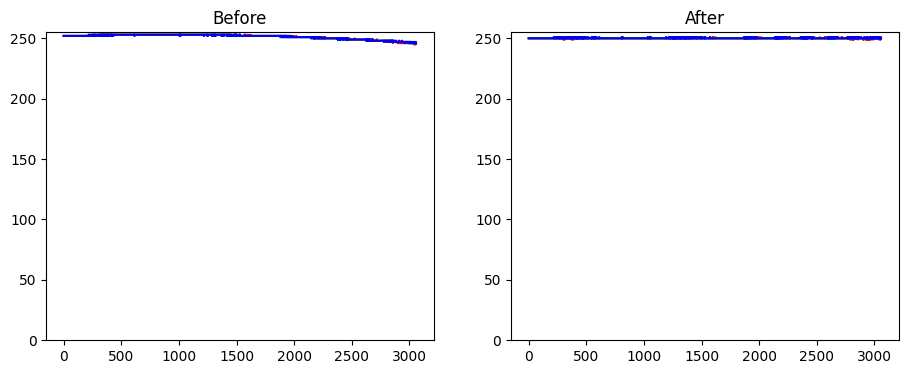

In [81]:
prof_org = test_flatfield[1200]
prof_corr = corrected_test_bright[1200]

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.plot(prof_org[:,0], c="r")
plt.plot(prof_org[:,1], c="g")
plt.plot(prof_org[:,1], c="b")
plt.ylim(0, 255)
plt.subplot(122)
plt.title("After")
plt.plot(prof_corr[:,0], c="r")
plt.plot(prof_corr[:,1], c="g")
plt.plot(prof_corr[:,1], c="b")
plt.ylim(0, 255)
plt.show()

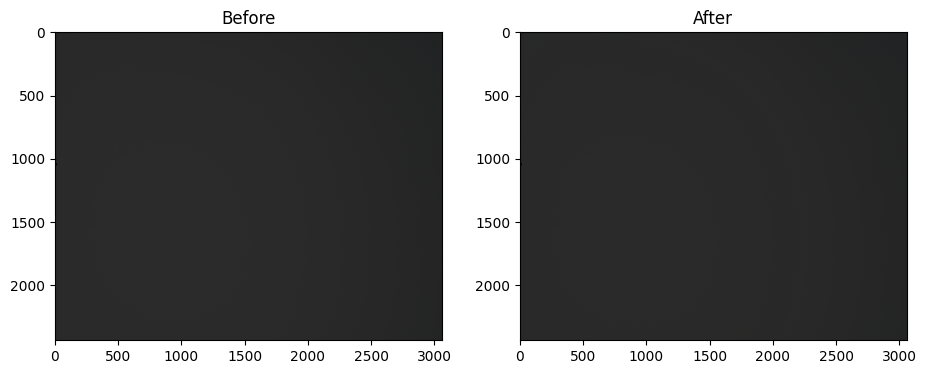

In [92]:
test_flatfield2 = flatfields[0].copy() - 210

corrected_test_bright2 = (test_flatfield2 / flatfield * flatfield.mean()).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.imshow(test_flatfield2, interpolation="None")
plt.subplot(122)
plt.title("After")
plt.imshow(corrected_test_bright2, interpolation="None")
plt.show()

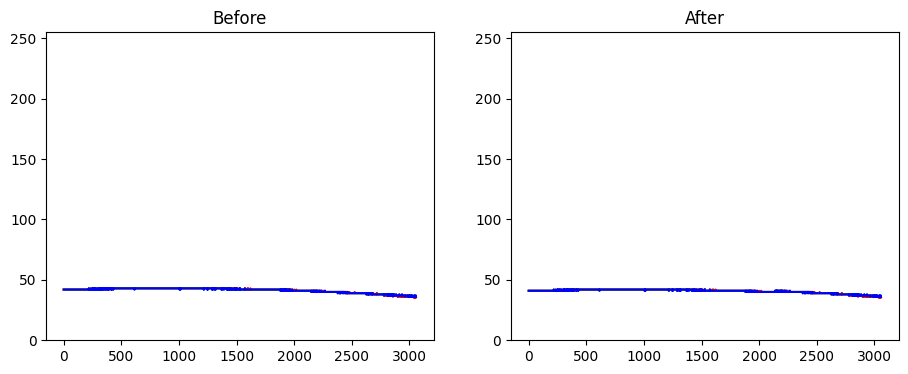

In [93]:
prof_org2 = test_flatfield2[1200]
prof_corr2 = corrected_test_bright2[1200]

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.plot(prof_org2[:,0], c="r")
plt.plot(prof_org2[:,1], c="g")
plt.plot(prof_org2[:,1], c="b")
plt.ylim(0, 255)
plt.subplot(122)
plt.title("After")
plt.plot(prof_corr2[:,0], c="r")
plt.plot(prof_corr2[:,1], c="g")
plt.plot(prof_corr2[:,1], c="b")
plt.ylim(0, 255)
plt.show()

In [41]:
corrected = (frame / flatfield * flatfield.mean(axis=2)).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.imshow(frame, interpolation="None")
plt.subplot(122)
plt.imshow(corrected, interpolation="None")
plt.show()

ValueError: operands could not be broadcast together with shapes (2435,3058,3) (2435,3058) 

In [50]:
corrected.max(), corrected.mean(axis=2).max()

(255, 255.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


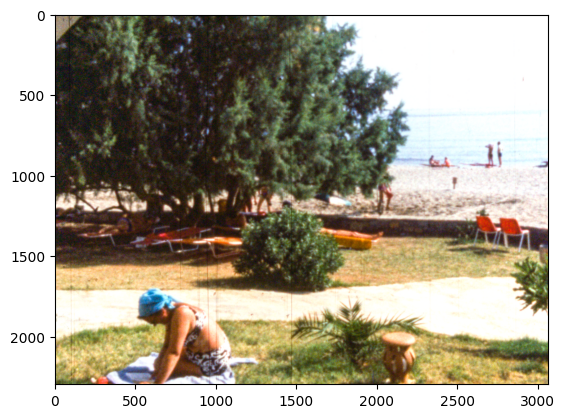

In [22]:
corrected = np.array(rgb) / np.array(ff)

plt.imshow(corrected, interpolation=None)
plt.show()

<ipython-input-16-d21e2e93ea6c>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(corrected / rgb, interpolation=None)


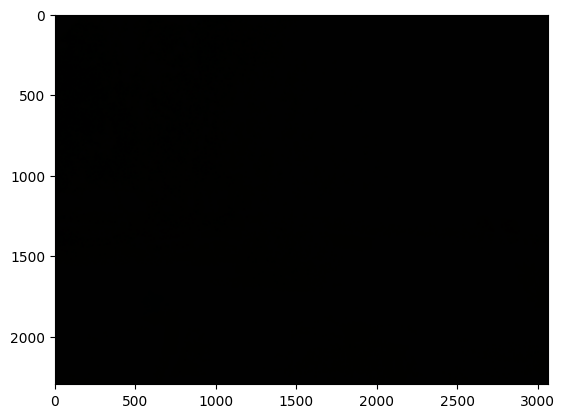

In [16]:
backs

plt.imshow(corrected * rgb, interpolation=None)
plt.show()

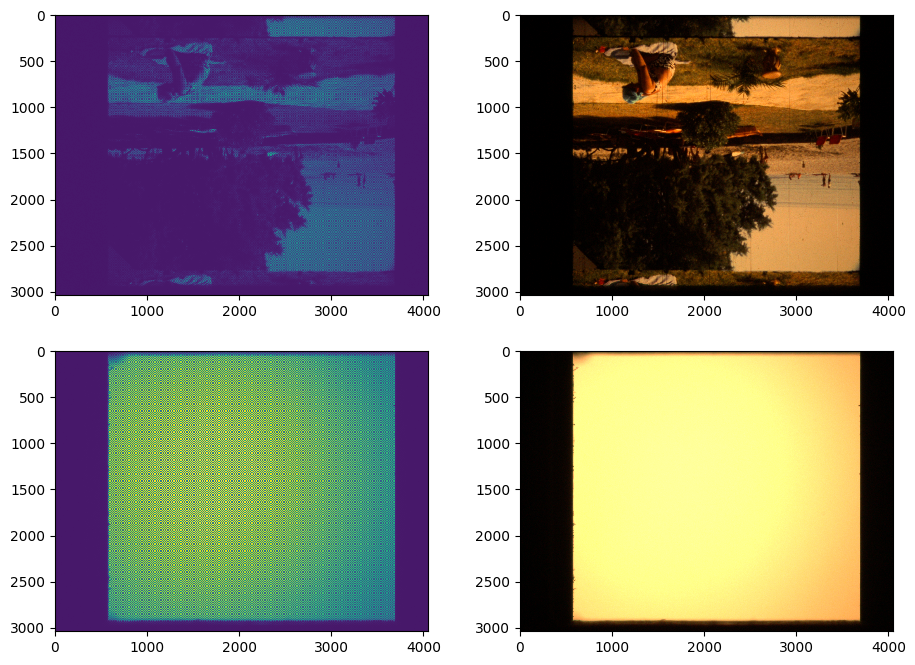

In [8]:
plt.figure(figsize=(11,8))
plt.subplot(221)
plt.imshow(raw.raw_image, interpolation="None", vmin=0, vmax=4095)
plt.subplot(222)
plt.imshow(rgb, interpolation="None", vmin=0, vmax=255)
plt.subplot(223)
plt.imshow(ff.raw_image, interpolation="None", vmin=0, vmax=4095)
plt.subplot(224)
plt.imshow(rgbff, interpolation="None", vmin=0, vmax=255)
plt.show()

In [9]:
raw.black_level_per_channel

[256, 256, 256, 256]

In [10]:
flat_field = ff.raw_image

In [11]:
black = 256

In [14]:
corrected = raw.raw_image * (raw.raw_image - black).clip(0, None) / (flat_field - black).clip(1, None)

In [19]:
corrected.astype(np.uint16)

array([[21760, 16320,   257, ...,     0, 21676,   259],
       [  129,   516,   259, ...,   777,   516,   516],
       [    0,    85, 32640, ...,   129,   777,     0],
       ...,
       [  129, 32640,    64, ...,   172,   155,     0],
       [    0,     0,    85, ...,   172,   128,    42],
       [   36,   777,   129, ...,   129,    32, 32514]], dtype=uint16)

In [20]:
raw.raw_image

array([[255, 255, 257, ..., 256, 254, 259],
       [258, 258, 259, ..., 259, 258, 258],
       [256, 257, 255, ..., 258, 259, 256],
       ...,
       [259, 255, 257, ..., 258, 259, 256],
       [256, 256, 257, ..., 258, 257, 257],
       [257, 259, 258, ..., 259, 257, 254]], dtype=uint16)

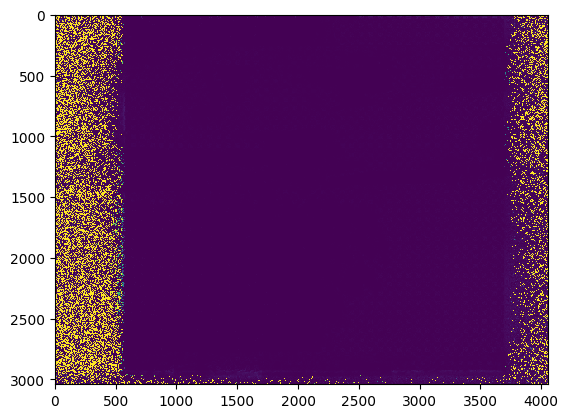

In [17]:
plt.imshow(corrected, interpolation="None", vmin=0, vmax=4095)
plt.show()

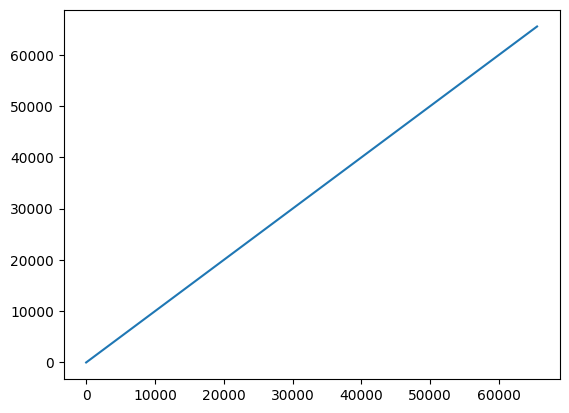

In [22]:
plt.plot(raw.tone_curve)
plt.show()